**Importinng the Libraries**

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('usArrests.csv')
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


**Getting to know the dataset**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [44]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Hopkins Test**

In [45]:
#!pip install pyclustertend

In [46]:
#from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [47]:
#hopkins(scale(df),df.shape[0])

**Kmeans Modelling**

In [48]:
from sklearn.cluster import KMeans

In [49]:
k_means=KMeans(n_clusters=2,random_state=42)

In [50]:
clusters=k_means.fit_predict(df.iloc[:,1:].values)
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

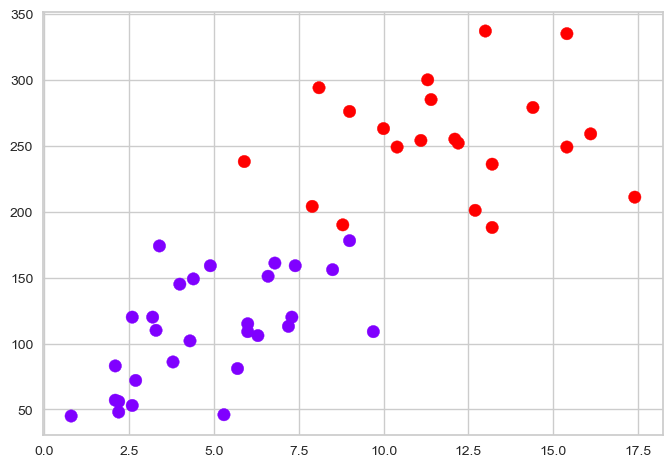

In [51]:
plt.scatter(df.iloc[:,1],df.iloc[:,2],c=clusters,s=80,cmap='rainbow');

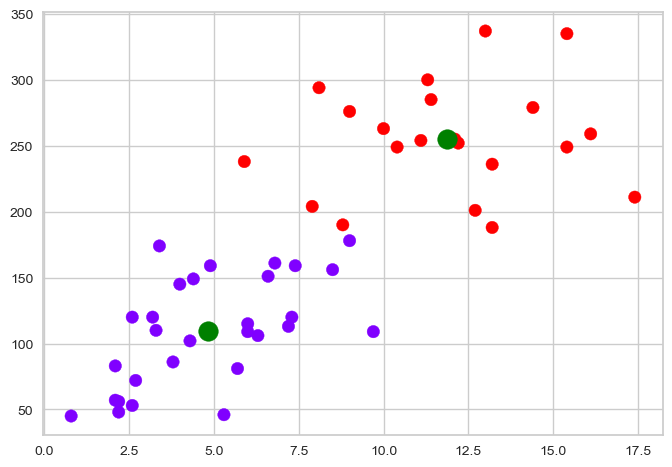

In [52]:
plt.scatter(df.iloc[:,1],df.iloc[:,2],c=clusters,s=80,cmap='rainbow')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],c='green',s=200);

**Elbow Method**

In [53]:
n=range(1,11)
wccs=[]
for i in n:
    k_means=KMeans(n_clusters=i,random_state=42)
    k_means.fit(df.iloc[:,1:])
    wccs.append(k_means.inertia_)
wccs    

[355807.8216,
 96399.02814449917,
 47964.26535714285,
 34728.629357142854,
 24499.388190476187,
 21781.098107142854,
 16132.075249999998,
 15432.733166666669,
 12646.392333333333,
 10468.535476190476]

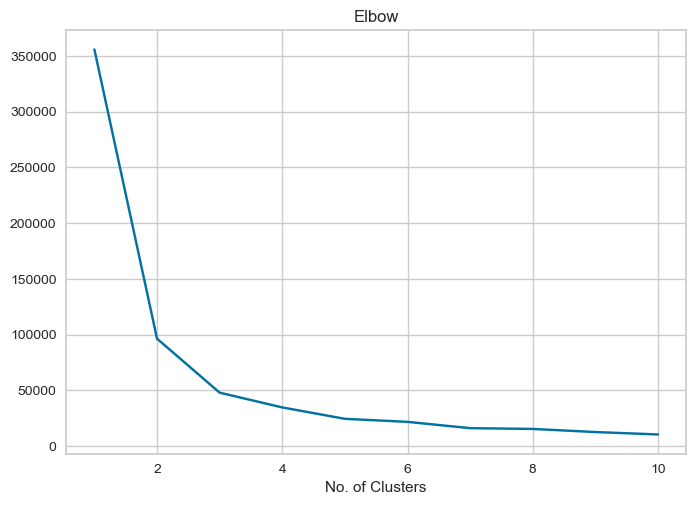

In [54]:
plt.plot(n, wccs)
plt.title('Elbow')
plt.xlabel('No. of Clusters');

In [55]:
from yellowbrick.cluster import KElbowVisualizer

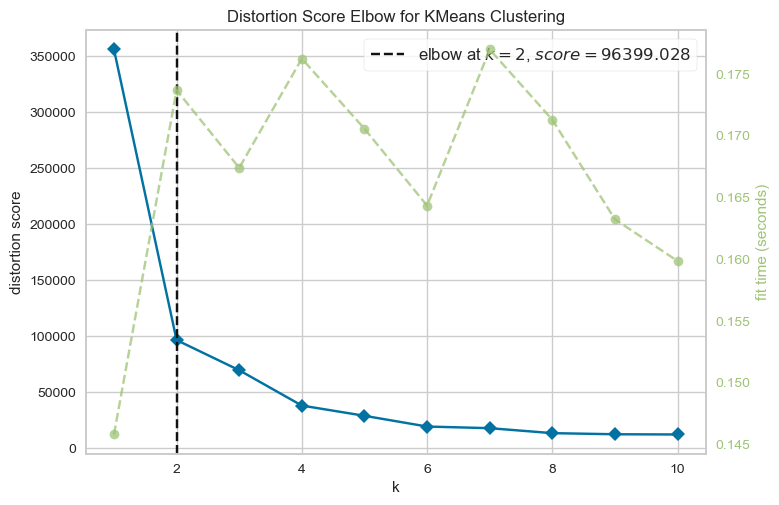

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
kmeans_yellowbricks=KMeans()
graph=KElbowVisualizer(kmeans_yellowbricks,k=(1,11))
graph.fit(df.iloc[:,1:])
graph.poof()

In [57]:
new_kmeans=KMeans(n_clusters=3,random_state=42)
new_kmeans.fit(df.iloc[:,1:])
labels = new_kmeans.labels_

In [58]:
print(labels)

[1 1 1 2 1 2 0 1 1 2 0 0 1 0 0 0 0 1 0 1 2 1 0 1 2 0 0 1 0 2 1 1 1 0 0 2 2
 0 2 1 0 2 2 0 0 2 2 0 0 2]


In [59]:
df['cluster_id']=labels

In [60]:
df.head()

,City,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


**Silhouette Score**

In [61]:
from sklearn.metrics import silhouette_score

In [62]:
print(f'Silhouette Score(n=3): {silhouette_score(df.iloc[:,1:],labels)}')

Silhouette Score(n=3): 0.5320343512332179


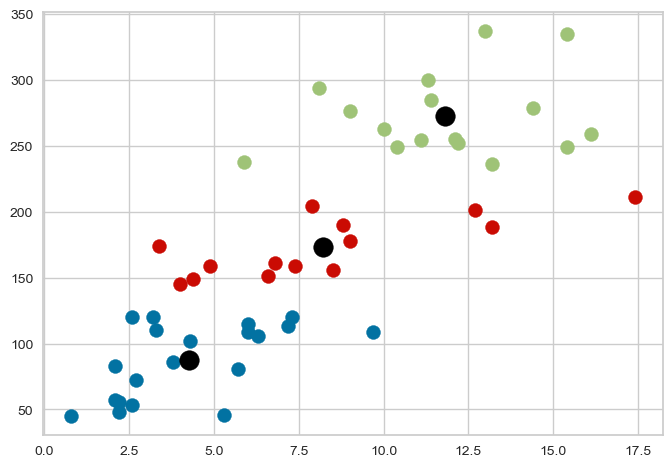

In [63]:
for i in np.unique(labels):
    plt.scatter(df.iloc[:,1:].values[labels==i,0],df.iloc[:,1:].values[labels==i,1],label=i,s=100)
plt.scatter(new_kmeans.cluster_centers_[:,0],new_kmeans.cluster_centers_[:,1],c='black',s=200,label='centroid');

**ARI Score**

In [64]:
from sklearn.metrics import adjusted_rand_score

In [65]:
new_df=df.sample(15,random_state=42)
new_df

,City,Murder,Assault,UrbanPop,Rape,cluster_id
13,Indiana,7.2,113,65,21.0,0
39,South Carolina,14.4,279,48,22.5,1
30,New Mexico,11.4,285,70,32.1,1
45,Virginia,8.5,156,63,20.7,2
17,Louisiana,15.4,249,66,22.2,1
48,Wisconsin,2.6,53,66,10.8,0
26,Nebraska,4.3,102,62,16.5,0
25,Montana,6.0,109,53,16.4,0
32,North Carolina,13.0,337,45,16.1,1
19,Maryland,11.3,300,67,27.8,1


In [66]:
new_df['true label']=new_kmeans.predict(new_df.iloc[:,1:-1])

In [67]:
new_df

,City,Murder,Assault,UrbanPop,Rape,cluster_id,true label
13,Indiana,7.2,113,65,21.0,0,0
39,South Carolina,14.4,279,48,22.5,1,1
30,New Mexico,11.4,285,70,32.1,1,1
45,Virginia,8.5,156,63,20.7,2,2
17,Louisiana,15.4,249,66,22.2,1,1
48,Wisconsin,2.6,53,66,10.8,0,0
26,Nebraska,4.3,102,62,16.5,0,0
25,Montana,6.0,109,53,16.4,0,0
32,North Carolina,13.0,337,45,16.1,1,1
19,Maryland,11.3,300,67,27.8,1,1


In [68]:
adjusted_rand_score(new_df.cluster_id,new_df['true label'])

1.0